In [53]:
import pandas as pd
from cs336_data.identify import identify_language
from tqdm.auto import tqdm
import matplotlib.pyplot as plt

In [2]:
model_path = "../data/lid.176.bin"

In [22]:
manual_lang_ids = [
    "",
    "en",
    "en",
    "zh",
    "it",
    "en",
    "nl",
    "ru",
    "nl",
    "zh",
    "zh",
    "zh",
    "en",
    "zh",
    "zh",
    "zh",
    "zh",
    "zh",
    "zh",
    "zh",
    "fr",
    "en",
    "ru",
    "fr",
    "fr",
    "fa",
    "it",
]

In [37]:
tab = []
for i in range(1, 26):
    if i >= 4:
        patch_i = i + 1
    else:
        patch_i = i
    with open(f"../data/warc_txt/{patch_i}.txt", "r") as f:
        text = f.read()
    lang_id, prob = identify_language(model_path, text)
    tab.append(
        {
            "#": i,
            "Text (truncated)": text[:40].replace("\n", "\\n").replace("|", "\|"),
            "Language (manual)": manual_lang_ids[i],
            "Language (fasttext)": lang_id,
            "Probability (fasttext)": f"{prob:.3f}",
        }
    )
df = pd.DataFrame(tab)
df

,#,Text (truncated),Language (manual),Language (fasttext),Probability (fasttext)
0,1,• Home\n • Categories\n • New\n • Popu,en,en,0.546
1,2,Sorry this model no exist in webcams onl,en,en,0.702
2,3,三元风水 神通玄空 家居风水 喜庆择日 起名改名 旺宅安神 转运法事 风水软件,zh,zh,0.963
3,4,Skip to content\n\nquello che è un fungo s,it,it,0.970
4,5,Search The Directory\nSubmit URL \nHome >,en,en,0.767
5,6,banner\nbanner to be\nterug naar e-spots.n,nl,nl,0.798
6,7,03 онлайн 03 Онлайн Задать вопрос Наши в,ru,ru,0.995
7,8,banner\nbanner to be\nterug naar e-spots.n,nl,nl,0.673
8,9,24HR客服專線:02-27654066 \n \n \n帳 號\n密 碼\n圖片,zh,zh,0.985
9,10,\n客服留言\n客服留言\n\n熱門關鍵字\n 關鍵字\n威而鋼 viagra 壯陽藥 犀利,zh,zh,0.985


In [38]:
print(df.to_markdown(index=False))

|   # | Text (truncated)                                                             | Language (manual)   | Language (fasttext)   |   Probability (fasttext) |
|----:|:-----------------------------------------------------------------------------|:--------------------|:----------------------|-------------------------:|
|   1 | • Home\n  • Categories\n  • New\n  • Popu                                    | en                  | en                    |                    0.546 |
|   2 | Sorry this model no exist in webcams onl                                     | en                  | en                    |                    0.702 |
|   3 | 三元风水 神通玄空 家居风水 喜庆择日 起名改名 旺宅安神 转运法事 风水软件      | zh                  | zh                    |                    0.963 |
|   4 | Skip to content\n\nquello che è un fungo s                                   | it                  | it                    |                    0.97  |
|   5 | Search The Directory\nSubmit URL  \nHome >                      

In [49]:
probs = []
for i in tqdm(range(1, 1_001)):
    with open(f"../data/warc_txt/{i}.txt", "r") as f:
        text = f.read()
    lang_id, prob = identify_language(model_path, text)
    if lang_id == "en":
        probs.append(prob)

  0%|          | 0/1000 [00:00<?, ?it/s]

In [51]:
len(probs), len(probs)/1000

(272, 0.272)

(array([11.,  6.,  6., 13., 14., 28., 42., 41., 58., 53.]),
 array([0.07678044, 0.16734275, 0.25790505, 0.34846736, 0.43902967,
        0.52959198, 0.62015429, 0.71071659, 0.8012789 , 0.89184121,
        0.98240352]),
 <BarContainer object of 10 artists>)

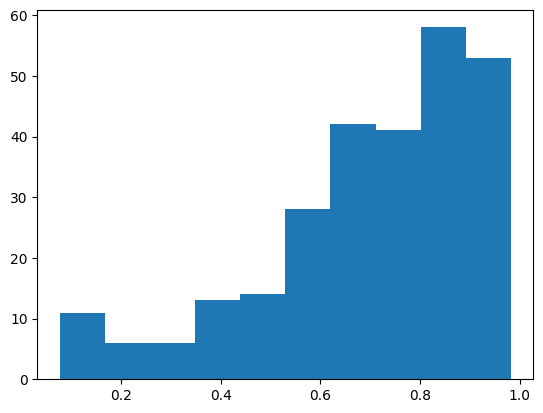

In [54]:
plt.hist(probs)